In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import linear_model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.layers import LSTM

import numpy as np
import tensorflow as tf

from mpl_toolkits.mplot3d import Axes3D

from keras.models import Model,Sequential,load_model
from keras.layers import Input,Dense,Convolution1D,Activation
from keras.utils import plot_model


Using TensorFlow backend.


In [38]:
data_w_mat = io.loadmat(os.path.join('reaction_diffusion_big.mat'))
u_input = data_w_mat['u']
# print(u.shape)
N_inputs = 512
time = 201
u_2d = np.reshape(u_input, ((N**2, time)))

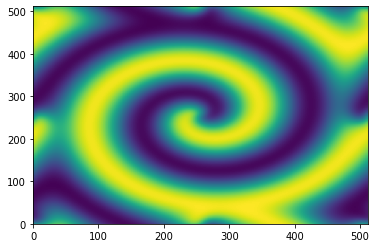

In [3]:
plt.pcolor(u[:,:,-1])
plt.show()

In [28]:
print(u_2d.shape)

(262144, 201)


In [4]:
U,Sigma,VT = np.linalg.svd(u_2d,full_matrices=0)

shape Sigma =  (201,)


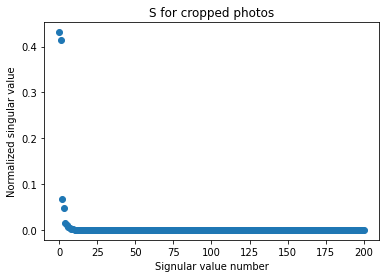

shape U =  (262144, 201)


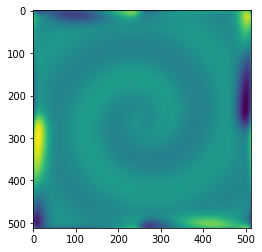

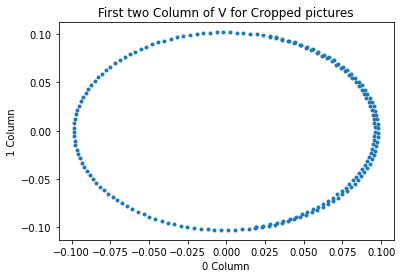

In [5]:
print("shape Sigma = ", Sigma.shape)
plt.plot(Sigma/ (sum(Sigma)), 'o')
plt.title("S for cropped photos")
plt.xlabel('Signular value number')
plt.ylabel("Normalized singular value")
plt.show()

print("shape U = ", U.shape)
face = np.reshape(U[:,2],((N,N))).T
# plt.plot(face)
plt.imshow(face)
# plt.title('Tenth column of U for cropped photos')
plt.show()

V = np.transpose(VT)

plt.plot(V[:, 0], V[:,1], '.')
# plt.plot(V[:n_female, 0], V[:n_female, 1], '.')
# plt.imshow(face)
plt.xlabel("0 Column")
plt.ylabel("1 Column")
plt.title("First two Column of V for Cropped pictures")
plt.show()

(201, 201)


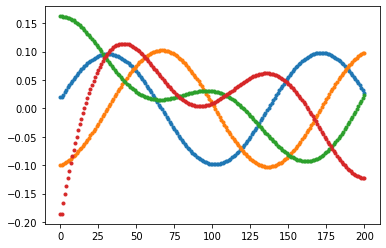

In [6]:
print(V.shape)
plt.plot(V[:, 0], '.')
plt.plot( V[:,1], '.')
plt.plot(V[:, 2], '.')
plt.plot( V[:,3], '.')


plt.show()

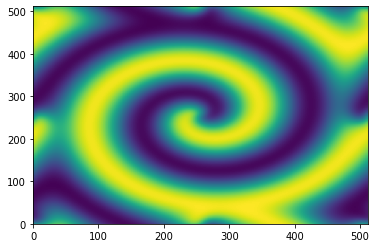

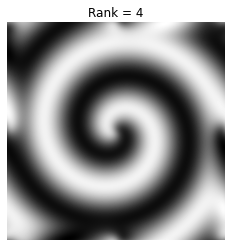

In [44]:
rank = 4
new = np.matmul(np.matmul(U[:,:rank], np.diag(Sigma[:rank])), VT[:rank, :])
# error = np.linalg.norm(new_faces - faces, ord = 2) / np.linalg.norm(faces, ord = 2)
# error_list1.append(error)

plt.pcolor(u[:,:,-1])
plt.show()
face = np.reshape(new[:,-1],(N,N))
img = plt.imshow(face)
img.set_cmap('gray')
plt.title("Rank = " + str(rank))
plt.axis('off')
plt.show()

In [56]:
rank = 4
U_small = U[:,:rank]
S_small = Sigma[:rank]
VT_small= VT[:rank]
V_small = VT_small.T
print(V_small.shape)


SVD_input_data = np.delete(VT_small,np.s_[200::201],axis=1).T
SVD_target_data = np.delete(VT_small,np.s_[1::201],axis=1).T
SVD_input_data.shape

(201, 4)


(200, 4)

In [57]:
nn_input = V_small[:-1,:]
nn_output = V_small[1:,:]
print(nn_input.shape)
print(nn_output.shape)

# nn_input = np.array([[1], [2], [3]])
# nn_output = np.array([[2], [3], [4]])

(200, 4)
(200, 4)


In [59]:
N = 4
T = 200

In [60]:
model = Sequential()
model.add(Dense(2*N, activation='sigmoid',  input_shape = (N,)))
model.add(Dense(2*N, activation='relu'))
model.add(Dense(2*N, activation='linear'))
model.add(Dense(N))

In [61]:
sgd_optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='mean_squared_error')
history = model.fit(nn_input, nn_output, epochs=300, validation_split=0.2)

Train on 160 samples, validate on 40 samples
Epoch 1/300
160/160 [==============================] - 0s 720us/step - loss: 0.0245 - val_loss: 0.0068
Epoch 2/300
160/160 [==============================] - 0s 32us/step - loss: 0.0071 - val_loss: 0.0175
Epoch 3/300
160/160 [==============================] - 0s 38us/step - loss: 0.0083 - val_loss: 0.0252
Epoch 4/300
160/160 [==============================] - 0s 37us/step - loss: 0.0079 - val_loss: 0.0154
Epoch 5/300
160/160 [==============================] - 0s 56us/step - loss: 0.0044 - val_loss: 0.0074
Epoch 6/300
160/160 [==============================] - 0s 31us/step - loss: 0.0049 - val_loss: 0.0055
Epoch 7/300
160/160 [==============================] - 0s 62us/step - loss: 0.0050 - val_loss: 0.0066
Epoch 8/300
160/160 [==============================] - 0s 31us/step - loss: 0.0042 - val_loss: 0.0094
Epoch 9/300
160/160 [==============================] - 0s 69us/step - loss: 0.0043 - val_loss: 0.0109
Epoch 10/300
160/160 [==============

160/160 [==============================] - 0s 37us/step - loss: 0.0041 - val_loss: 0.0090
Epoch 81/300
160/160 [==============================] - 0s 56us/step - loss: 0.0041 - val_loss: 0.0088
Epoch 82/300
160/160 [==============================] - 0s 37us/step - loss: 0.0041 - val_loss: 0.0088
Epoch 83/300
160/160 [==============================] - 0s 56us/step - loss: 0.0041 - val_loss: 0.0089
Epoch 84/300
160/160 [==============================] - 0s 37us/step - loss: 0.0041 - val_loss: 0.0089
Epoch 85/300
160/160 [==============================] - 0s 62us/step - loss: 0.0041 - val_loss: 0.0090
Epoch 86/300
160/160 [==============================] - 0s 31us/step - loss: 0.0041 - val_loss: 0.0090
Epoch 87/300
160/160 [==============================] - ETA: 0s - loss: 0.003 - 0s 62us/step - loss: 0.0041 - val_loss: 0.0088
Epoch 88/300
160/160 [==============================] - 0s 31us/step - loss: 0.0041 - val_loss: 0.0088
Epoch 89/300
160/160 [==============================] - 0s 62u

160/160 [==============================] - 0s 31us/step - loss: 0.0041 - val_loss: 0.0088
Epoch 159/300
160/160 [==============================] - 0s 56us/step - loss: 0.0041 - val_loss: 0.0088
Epoch 160/300
160/160 [==============================] - 0s 84us/step - loss: 0.0041 - val_loss: 0.0090
Epoch 161/300
160/160 [==============================] - 0s 37us/step - loss: 0.0041 - val_loss: 0.0089
Epoch 162/300
160/160 [==============================] - 0s 62us/step - loss: 0.0041 - val_loss: 0.0087
Epoch 163/300
160/160 [==============================] - 0s 31us/step - loss: 0.0041 - val_loss: 0.0087
Epoch 164/300
160/160 [==============================] - 0s 62us/step - loss: 0.0041 - val_loss: 0.0089
Epoch 165/300
160/160 [==============================] - 0s 31us/step - loss: 0.0041 - val_loss: 0.0090
Epoch 166/300
160/160 [==============================] - 0s 56us/step - loss: 0.0041 - val_loss: 0.0090
Epoch 167/300
160/160 [==============================] - 0s 31us/step - loss: 

160/160 [==============================] - 0s 56us/step - loss: 0.0040 - val_loss: 0.0090
Epoch 237/300
160/160 [==============================] - 0s 31us/step - loss: 0.0040 - val_loss: 0.0090
Epoch 238/300
160/160 [==============================] - 0s 56us/step - loss: 0.0040 - val_loss: 0.0090
Epoch 239/300
160/160 [==============================] - 0s 31us/step - loss: 0.0040 - val_loss: 0.0088
Epoch 240/300
160/160 [==============================] - 0s 62us/step - loss: 0.0040 - val_loss: 0.0088
Epoch 241/300
160/160 [==============================] - 0s 31us/step - loss: 0.0040 - val_loss: 0.0088
Epoch 242/300
160/160 [==============================] - 0s 56us/step - loss: 0.0040 - val_loss: 0.0089
Epoch 243/300
160/160 [==============================] - 0s 31us/step - loss: 0.0040 - val_loss: 0.0090
Epoch 244/300
160/160 [==============================] - 0s 44us/step - loss: 0.0040 - val_loss: 0.0090
Epoch 245/300
160/160 [==============================] - 0s 31us/step - loss: 

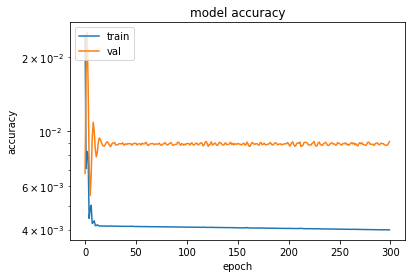

In [62]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
print(T)
predicted = np.zeros(V_small[0:-1].shape)
predicted[0] = V_small[0]
for k in range(len(V_small)-2):
    predicted[k+1] = model.predict(np.array([predicted[k]]))

200


In [64]:
print(predicted.shape)
print(predicted)

(200, 4)
[[ 0.0193396  -0.10004744  0.16215779 -0.18581475]
 [ 0.003174   -0.00492836  0.04374781  0.04957081]
 [ 0.00617037 -0.00882552  0.02865936  0.03899584]
 [ 0.0049716  -0.00830186  0.02950472  0.03861601]
 [ 0.00491797 -0.00828094  0.02955643  0.0386107 ]
 [ 0.00491712 -0.00828077  0.02955728  0.03861063]
 [ 0.00491711 -0.00828078  0.02955724  0.03861057]
 [ 0.00491711 -0.00828077  0.02955728  0.03861058]
 [ 0.00491711 -0.00828078  0.02955724  0.03861057]
 [ 0.00491711 -0.00828077  0.02955728  0.03861058]
 [ 0.00491711 -0.00828078  0.02955724  0.03861057]
 [ 0.00491711 -0.00828077  0.02955728  0.03861058]
 [ 0.00491711 -0.00828078  0.02955724  0.03861057]
 [ 0.00491711 -0.00828077  0.02955728  0.03861058]
 [ 0.00491711 -0.00828078  0.02955724  0.03861057]
 [ 0.00491711 -0.00828077  0.02955728  0.03861058]
 [ 0.00491711 -0.00828078  0.02955724  0.03861057]
 [ 0.00491711 -0.00828077  0.02955728  0.03861058]
 [ 0.00491711 -0.00828078  0.02955724  0.03861057]
 [ 0.00491711 -0.00828

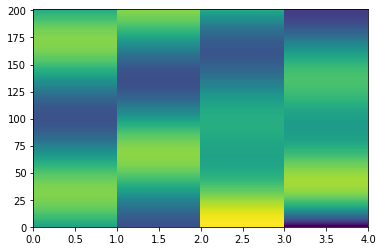

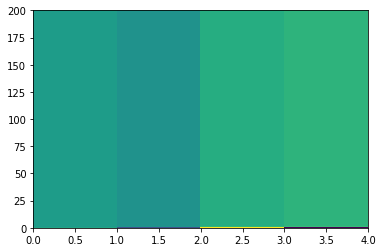

In [65]:
plt.pcolor(V_small)
plt.show()
plt.pcolor(predicted)
plt.show()

(262144, 200)


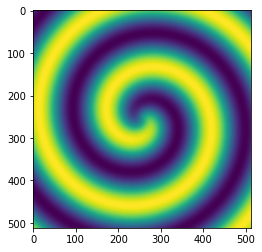

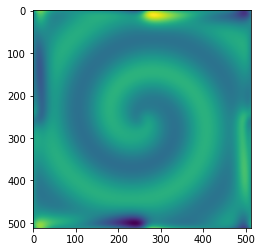

In [68]:
# rank = 
new = np.matmul(np.matmul(U[:,:rank], np.diag(Sigma[:rank])), predicted.T)
# error = np.linalg.norm(new_faces - faces, ord = 2) / np.linalg.norm(faces, ord = 2)
# error_list1.append(error)
print(new.shape)
plt.imshow(u_input[:,:,1])
plt.show()
face = np.reshape(new[:,1],(512, 512))
img = plt.imshow(face)
# img.set_cmap('gray')
# plt.title("Rank = " + str(rank))
# plt.axis('off')
plt.show()

(200,)


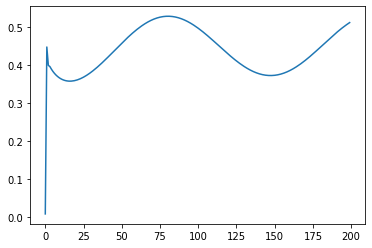

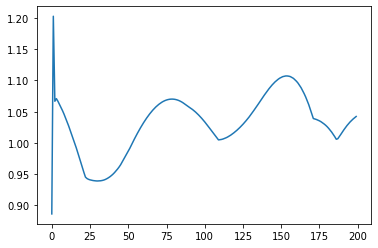

In [67]:
mse = ((u_2d[:,:-1] - new)**2).mean(axis=0)
print(mse.shape)
plt.plot(mse)
plt.show()

max_error = (abs(u_2d[:,:-1] - new)).max(axis=0)
# print(mse)
plt.plot(max_error)
plt.show()